In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Scypy (Continuación)

# Integración

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [2]:
from scipy import integrate

In [5]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)

In [7]:
integral, error = integrate.quad(f,0,1)

In [8]:
integral

0.14558175869954834

In [9]:
error

1.6162822047366225e-15

In [10]:
integrando = lambda x:x**2*np.sin(2*x)*np.exp(-x)

In [11]:
integral, error = integrate.quad(integrando,0,1)

In [12]:
integral

0.14558175869954834

In [13]:
error

1.6162822047366225e-15

Doble integral

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [15]:
integrando=lambda y, x: np.sin(x+y**2)
y_inf=lambda x:-x
y_sup=lambda x:x**2

In [17]:
integral, error = integrate.dblquad(integrando,0,1, y_inf, y_sup)

In [18]:
integral

0.590090324408853

In [19]:
error

2.0545915475811425e-14

In [20]:
#Para integración de más variables usar=
integrate.nquad

<function scipy.integrate.quadpack.nquad(func, ranges, args=None, opts=None, full_output=False)>

## Derivada

In [22]:
from scipy import misc

Derivar $x^{3}$

In [23]:
def f(x):
    return x**2

In [24]:
x=np.linspace(0,1,100)

In [26]:
derivada=misc.derivative(f, x, dx=1e-7)

In [27]:
segunda_der=misc.derivative(f, x, dx=1e-7, n=2)

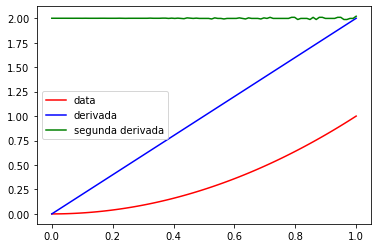

In [29]:
plt.plot(x, f(x), 'r', label='data')
plt.plot(x,derivada,'b', label='derivada')
plt.plot(x,segunda_der,'g',label='segunda derivada')
plt.legend()

## Ecuaciones diferenciales (ODEs)

Caída libre con fricción

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [31]:
from scipy import integrate

In [32]:
def dvdt(v,t):
    return 2*v**2-4
v0=0

In [33]:
t=np.linspace(0,1,100)
solución=integrate.odeint(dvdt, v0, t)

In [49]:
solución.T[0]

array([ 0.        , -0.04039307, -0.08072028, -0.1209162 , -0.16091629,
       -0.20065721, -0.24007734, -0.27911704, -0.31771903, -0.35582878,
       -0.3933947 , -0.43036838, -0.46670485, -0.50236272, -0.53730429,
       -0.57149564, -0.6049067 , -0.63751127, -0.66928694, -0.70021499,
       -0.73028047, -0.75947198, -0.78778149, -0.81520428, -0.8417387 ,
       -0.86738601, -0.89215022, -0.91603779, -0.93905755, -0.96122038,
       -0.98253909, -1.00302818, -1.02270364, -1.04158274, -1.05968392,
       -1.07702653, -1.09363072, -1.10951728, -1.12470745, -1.13922285,
       -1.15308532, -1.16631682, -1.17893932, -1.1909747 , -1.20244469,
       -1.21337079, -1.22377418, -1.23367573, -1.24309585, -1.25205455,
       -1.26057135, -1.26866525, -1.27635474, -1.28365773, -1.29059164,
       -1.29717326, -1.30341883, -1.30934401, -1.31496389, -1.320293  ,
       -1.32534528, -1.33013413, -1.33467243, -1.33897247, -1.34304608,
       -1.34690453, -1.35055861, -1.35401865, -1.35729448, -1.36

In [50]:
v_sol=solución.T[0]

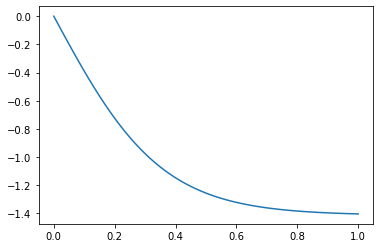

In [51]:
plt.plot(t, v_sol)

## ODEs acopladas

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Sea $S=(y_{1},y_{2})$, definamos una función que regrese
$dS/dx=(dy_{1}/dx, dy_{2}/dx)$

In [53]:
def dSdx(S, x):
    y1, y2 = S
    return [y1+y2**2+3*x,
           3*y1+y2**3-np.cos(x)]
y1_0=0
y2_0=0
S_0=(y1_0,y2_0)

In [54]:
x=np.linspace(0,1,100)
solución=integrate.odeint(dSdx,S_0,x)

In [56]:
solución.T

array([[ 0.00000000e+00,  1.53914061e-04,  6.19093356e-04,
         1.40076628e-03,  2.50418953e-03,  3.93464633e-03,
         5.69744401e-03,  7.79789517e-03,  1.02413187e-02,
         1.30330245e-02,  1.61783065e-02,  1.96824391e-02,
         2.35506573e-02,  2.77881638e-02,  3.24001125e-02,
         3.73915921e-02,  4.27676179e-02,  4.85331404e-02,
         5.46930282e-02,  6.12520553e-02,  6.82148995e-02,
         7.55861308e-02,  8.33702071e-02,  9.15714669e-02,
         1.00194121e-01,  1.09242251e-01,  1.18719801e-01,
         1.28630571e-01,  1.38978219e-01,  1.49766252e-01,
         1.60998020e-01,  1.72676732e-01,  1.84805434e-01,
         1.97387014e-01,  2.10424222e-01,  2.23919648e-01,
         2.37875730e-01,  2.52294784e-01,  2.67178978e-01,
         2.82530347e-01,  2.98350829e-01,  3.14642248e-01,
         3.31406342e-01,  3.48644774e-01,  3.66359140e-01,
         3.84551013e-01,  4.03221942e-01,  4.22373488e-01,
         4.42007253e-01,  4.62124894e-01,  4.82728181e-0

In [57]:
y1_sol=solución.T[0]
y2_sol=solución.T[1]

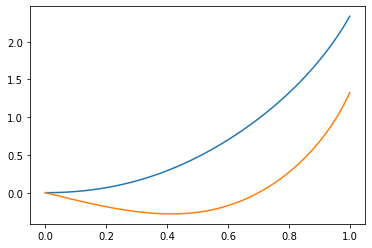

In [58]:
plt.plot(x,y1_sol)
plt.plot(x,y2_sol)

Segundo orden

Ecuación del péndulo

$$\theta'' - \sin(\theta) = 0 \hspace{10mm} \theta(0)=\pi/4 \hspace{10mm}\theta'(0)=0 $$

Una ODE de segundo orden puede ser convertida a ODEs de primer orden acopladas haciendo los cambios de variables adecuados

$$\omega=d\theta/dt$$
$$d\omega/dt=\sin(\theta)$$

$S=(\theta,\omega)$

In [83]:
def dSdt(S,t):
    theta, omega=S
    return [omega,np.sin(theta)]
theta_0=np.pi/4
omega_0=0
S_0=(theta_0,omega_0)

In [84]:
t=np.linspace(0,30,100)
solución=integrate.odeint(dSdt,S_0,t)

In [85]:
theta_sol=solución.T[0]
omega_sol=solución.T[1]

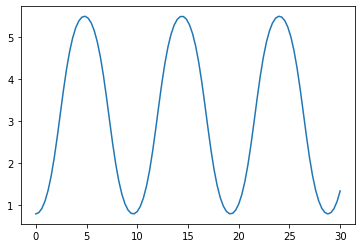

In [86]:
plt.plot(t,theta_sol)

## Funciones especiales

Los polinomios de Legendre $P_l(x)$: satisfacen $(1-x^2)y'' -2xy'+l(l+1)y = 0$

In [88]:
from scipy import special

In [95]:
x=np.linspace(0,1,100)
y=special.legendre(6)(x)

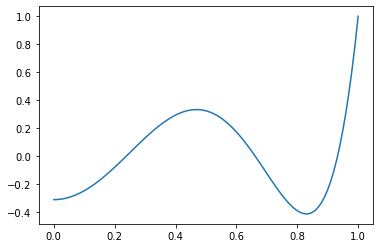

In [97]:
plt.plot(x,y)

Las funciones de Bessel $J_{\alpha}(x)$: satisfacen $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

In [100]:
x=np.linspace(0,10,100)
y=special.jv(3,x)

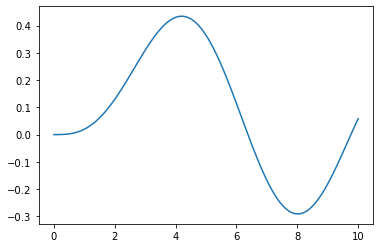

In [101]:
plt.plot(x,y)

## Optimización

In [103]:
from scipy import optimize

minimizar $f(x)=(x-3)^2$

In [104]:
def f(x):
    return (x-3)**2

respuesta=optimize.minimize(f,1)

In [105]:
respuesta

      fun: 3.2397920662551844e-16
 hess_inv: array([[0.5]])
      jac: array([-2.10976836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

In [106]:
respuesta.x

array([2.99999998])

In [107]:
respuesta.x[0]

2.9999999820005776

Minimizar $f(x, y) = (x-1)^2 + (y-2.5)^2$ sujeto a

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

In [108]:
f=lambda x:(x[0]-1)**2+(x[1]-2.5)**2

In [109]:
cons=({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds=((0,None),(0,None))

In [111]:
respuesta=optimize.minimize(f,(2,0),bounds=bnds,constraints=cons)

In [112]:
respuesta

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [113]:
respuesta.x

array([1.4, 1.7])

## Interpolación

In [116]:
x=np.linspace(0,10,10)
y=x**2*np.cos(x)

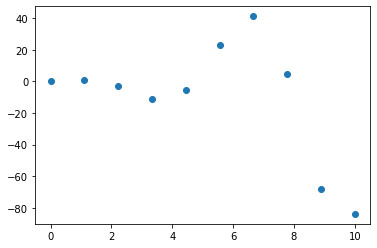

In [117]:
plt.scatter(x,y)